In [325]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import  linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import model_selection

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [326]:
tripdata = pd.read_csv("../dataset/final_bike_sharing.csv")

In [327]:
tripdata.head(3)

,tripduration,start_lat,start_lon,end_lat,end_lon,usertype,gender,dist,birthyear,date,...,feelslike,precip,dew,humidity,snow,windspeed,visibility,solarradiation,conditions,seasons
0,932,40.716247,-74.033459,40.728745,-74.032108,Subscriber,1,0.9,1992,2018-01-01,...,-17.0,0.0,-19.9,47.8,0.0,18.5,16.0,106.7,Clear,winter
1,550,40.716247,-74.033459,40.728745,-74.032108,Subscriber,2,0.9,1969,2018-01-01,...,-17.0,0.0,-19.9,47.8,0.0,18.5,16.0,106.7,Clear,winter
2,510,40.716247,-74.033459,40.728745,-74.032108,Subscriber,1,0.9,1946,2018-01-01,...,-17.0,0.0,-19.9,47.8,0.0,18.5,16.0,106.7,Clear,winter


### Amputation logic

In [328]:
## get the sample size such as 5%, 10%,20% etc
def get_sample_size(df, perc=5):
    return round(perc/100 * df.shape[0])

def get_an_index(index):
    li = []
    for i in index:
        li.append(i)
    return li  

def convert_to_dataframe(y_train):
    return pd.DataFrame(y_train)

def convert_to_series(y_train):
    return y_train.squeeze()
        
random.seed(100)
def ampute_nan_values(X_train,y_train,col_name, perc):
    index = get_an_index(X_train.index)
    sample_size = get_sample_size(X_train, perc)
    selected_index = random.sample(index, sample_size)
    y_train = convert_to_dataframe(y_train)
    for i in selected_index:
        if col_name in X_train.columns:
            X_train.at[i,col_name]= np.NaN
        else:
            X_train.loc[i] = np.NaN
        y_train.loc[i] = np.NaN
    y_train = convert_to_series(y_train)
    return X_train, y_train

### Split the data into train and test

In [329]:
tripdata.columns

Index(['tripduration', 'start_lat', 'start_lon', 'end_lat', 'end_lon',
       'usertype', 'gender', 'dist', 'birthyear', 'date', 'month', 'day',
       'hour', 'min', 'year', 'years_old', 'holiday', 'datetime', 'temp',
       'feelslike', 'precip', 'dew', 'humidity', 'snow', 'windspeed',
       'visibility', 'solarradiation', 'conditions', 'seasons'],
      dtype='object')

In [330]:
features = ['start_lat', 'start_lon', 'end_lat', 'end_lon',
       'usertype', 'gender', 'dist', 'birthyear', 'date', 'month', 'day',
       'hour', 'min', 'year', 'years_old', 'holiday', 'datetime', 'temp',
       'feelslike', 'precip', 'dew', 'humidity', 'snow', 'windspeed',
       'visibility', 'solarradiation', 'conditions', 'seasons']

In [331]:
X = tripdata.loc[:, features]
y = tripdata.loc[:, ['tripduration']]

In [332]:
print(X.shape , y.shape)

(352767, 28) (352767, 1)


In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)

In [334]:
print(X_train.shape , y_train.shape)

(282213, 28) (282213, 1)


In [335]:
print(X_test.shape , y_test.shape)

(70554, 28) (70554, 1)


### Ampute on Train data and Test

In [336]:
X_train_amp , y_train_amp = ampute_nan_values(X_train,y_train,"birthyear",perc=5)

In [337]:
print('Train after amputation', X_train_amp.shape, y_train_amp.shape)
print(X_train_amp.isnull().sum())
print(y_train_amp.isnull().sum())

Train after amputation (282213, 28) (282213,)
start_lat             0
start_lon             0
end_lat               0
end_lon               0
usertype              0
gender                0
dist                  0
birthyear         14111
date                  0
month                 0
day                   0
hour                  0
min                   0
year                  0
years_old             0
holiday               0
datetime              0
temp                  0
feelslike             0
precip                0
dew                   0
humidity              0
snow                  0
windspeed             0
visibility            0
solarradiation        0
conditions            0
seasons               0
dtype: int64
14111


In [338]:
X_test_amp , y_test_amp = ampute_nan_values(X_test,y_test,"birthyear",perc=5)
print('Test after amputation', X_test_amp.shape, y_test_amp.shape)
print(X_test_amp.isnull().sum())
print(y_test_amp.isnull().sum())

Test after amputation (70554, 28) (70554,)
start_lat            0
start_lon            0
end_lat              0
end_lon              0
usertype             0
gender               0
dist                 0
birthyear         3528
date                 0
month                0
day                  0
hour                 0
min                  0
year                 0
years_old            0
holiday              0
datetime             0
temp                 0
feelslike            0
precip               0
dew                  0
humidity             0
snow                 0
windspeed            0
visibility           0
solarradiation       0
conditions           0
seasons              0
dtype: int64
3528


#### 1. Imputation with mean

In [339]:
X_train_amp['birthyear'] = X_train_amp['birthyear'].fillna(X_train_amp['birthyear'].mean())

In [340]:
y_train_amp = y_train_amp.fillna(y_train_amp.mean())

In [341]:
print('Train after Imputation', X_train_amp.shape, y_train_amp.shape)
print(X_train_amp.isnull().sum())
print(y_train_amp.isnull().sum())

Train after Imputation (282213, 28) (282213,)
start_lat         0
start_lon         0
end_lat           0
end_lon           0
usertype          0
gender            0
dist              0
birthyear         0
date              0
month             0
day               0
hour              0
min               0
year              0
years_old         0
holiday           0
datetime          0
temp              0
feelslike         0
precip            0
dew               0
humidity          0
snow              0
windspeed         0
visibility        0
solarradiation    0
conditions        0
seasons           0
dtype: int64
0


In [342]:
X_test_amp['birthyear'] = X_test_amp['birthyear'].fillna(X_test_amp['birthyear'].mean())

In [343]:
y_test_amp = y_test_amp.fillna(y_test_amp.mean())

In [344]:
print('Train after Imputation', X_test_amp.shape, y_test_amp.shape)

Train after Imputation (70554, 28) (70554,)


In [345]:
print(X_test_amp.isnull().sum())
print(y_test_amp.isnull().sum())

start_lat         0
start_lon         0
end_lat           0
end_lon           0
usertype          0
gender            0
dist              0
birthyear         0
date              0
month             0
day               0
hour              0
min               0
year              0
years_old         0
holiday           0
datetime          0
temp              0
feelslike         0
precip            0
dew               0
humidity          0
snow              0
windspeed         0
visibility        0
solarradiation    0
conditions        0
seasons           0
dtype: int64
0


### One Hot encoding

In [346]:
categorical_features=identify_nominal_columns(X_train)
categorical_features

['usertype',
 'date',
 'month',
 'day',
 'holiday',
 'datetime',
 'conditions',
 'seasons']

In [347]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

def get_encoded_data(train, test):
    cols = ['usertype','date','month','day','holiday','datetime','conditions','seasons']
    for col in cols:
        train = one_hot_encoding(train, col)
        test = one_hot_encoding(test, col)
    train = train.astype('float32')
    test = test.astype('float32')
    return train , test


## Applay LinearRegression

In [348]:
X_train_encoded, X_test_encoded = get_encoded_data(X_train_amp, X_test_amp)
y_train = y_train_amp.astype('float32')
y_test = y_test_amp.astype('float32')

In [349]:
model = linear_model.LinearRegression().fit(X_train_encoded, y_train) 
print(model.intercept_)

-2409007.8


In [350]:
print(model.coef_)

[-1.75740552e+03 -3.45852478e+02  3.16094666e+02 -1.05842712e+03
  1.92588577e+01  2.95266174e+02 -3.58544922e+00  4.32531738e+00
  1.08064651e-01  1.17430920e+03 -1.26971436e+00  1.16297287e+02
 -3.11722717e+01 -1.31921387e+00 -8.14088898e+01  2.21595459e+01
  6.14973354e+00 -1.52294922e+00  1.33580780e+01  2.83813477e-02
 -9.38808350e+02  2.63537617e+01  5.23028221e+01  1.76588612e+01
  3.55287781e+01 -2.36561942e+00  4.26978912e+01  6.08192596e+01
  3.83042946e+01  2.16331120e+01 -1.90053349e+01 -8.44121170e+00
 -6.81749268e+01 -1.75116768e+01  1.39611053e+00 -1.34871473e+01
  1.41240149e+01  2.47785873e+01  2.79807568e+01 -2.16196938e+01
  1.63940182e+01 -3.05322790e+00  1.36690769e+01  8.56425476e+00
 -1.30623446e+01  1.64858036e+01 -1.61124592e+01 -5.97112656e+01
  1.51121864e+01 -6.88459730e+00  3.75275803e+01  3.51500893e+01
  1.96455059e+01 -6.40734863e+00  3.15376644e+01  7.64281303e-03
  5.89056015e+01  5.01961565e+00  1.35921669e+01  2.29477425e+01
 -4.48544693e+01 -2.12806

In [351]:
model.score(X_test_encoded, y_test)

0.1969677924152352

In [352]:
y_pred = model.predict(X_test_encoded)

In [353]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
292209   498.0     205.50
19585    221.0     355.50
116919   518.0     508.00
138648   531.0     455.25
46042    546.0     480.75
...        ...        ...
292855   197.0     248.50
18475   1093.0     650.25
100429   358.0     319.00
270749   197.0     333.00
98068    133.0     290.25

[70554 rows x 2 columns]


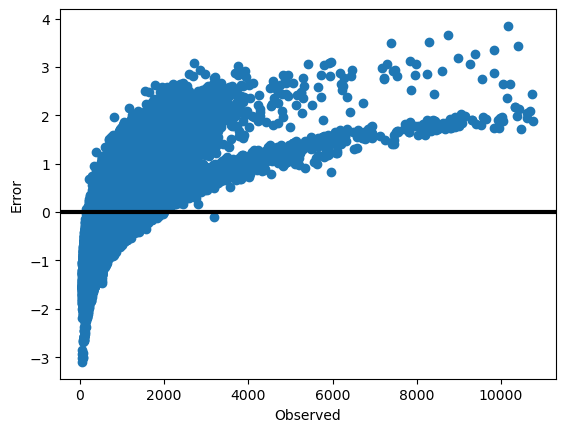

In [354]:
# plot the error difference
error = np.log(y_test) - np.log(y_pred)
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

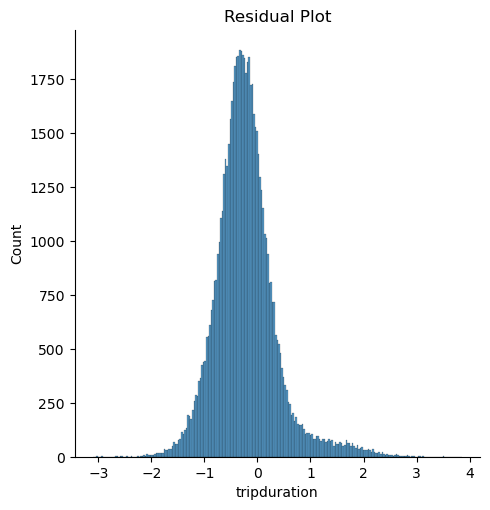

In [355]:
plt.figure()

sns.displot(error)

plt.title("Residual Plot")

In [356]:
#RMSE
print("RMSE is", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 error is " ,r2_score(y_test, y_pred))


RMSE is 574.3153
R2 error is  0.19696781421203025


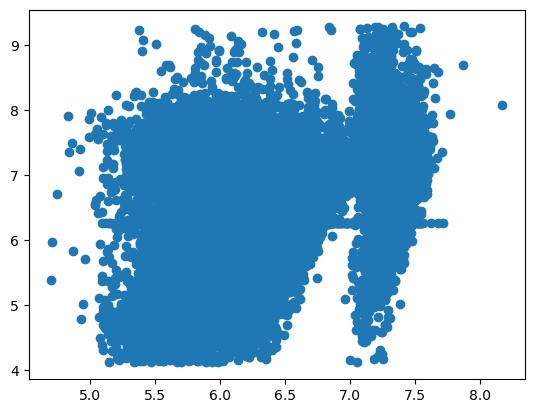

In [357]:
plt.scatter(np.log(y_pred), np.log(y_test))

### Imputation with removing NA values

In [358]:
## Ampute the data
X_train_amp , y_train_amp = ampute_nan_values(X_train,y_train,"birthyear",perc=5)
print('Test after amputation', X_train_amp.shape, y_train_amp.shape)
print(X_train_amp.isnull().sum())
print(y_train_amp.isnull().sum())

Test after amputation (282213, 28) (282213,)
start_lat             0
start_lon             0
end_lat               0
end_lon               0
usertype              0
gender                0
dist                  0
birthyear         14111
date                  0
month                 0
day                   0
hour                  0
min                   0
year                  0
years_old             0
holiday               0
datetime              0
temp                  0
feelslike             0
precip                0
dew                   0
humidity              0
snow                  0
windspeed             0
visibility            0
solarradiation        0
conditions            0
seasons               0
dtype: int64
14111


In [359]:
X_test_amp , y_test_amp = ampute_nan_values(X_test,y_test,"birthyear",perc=5)
print('Test after amputation', X_test_amp.shape, y_test_amp.shape)
print(X_test_amp.isnull().sum())
print(y_test_amp.isnull().sum())

Test after amputation (70554, 28) (70554,)
start_lat            0
start_lon            0
end_lat              0
end_lon              0
usertype             0
gender               0
dist                 0
birthyear         3528
date                 0
month                0
day                  0
hour                 0
min                  0
year                 0
years_old            0
holiday              0
datetime             0
temp                 0
feelslike            0
precip               0
dew                  0
humidity             0
snow                 0
windspeed            0
visibility           0
solarradiation       0
conditions           0
seasons              0
dtype: int64
3528


In [360]:
X_train_amp.dropna(axis=0, inplace=True)
y_train_amp.dropna(inplace=True)
print('Train after Imputation', X_train_amp.shape, y_train_amp.shape)

Train after Imputation (268102, 28) (268102,)


In [361]:
X_test_amp.dropna(axis=0, inplace=True)
y_test_amp.dropna(inplace=True)
print('Train after Imputation', X_test_amp.shape, y_test_amp.shape)

Train after Imputation (67026, 28) (67026,)


In [362]:
X_train_encoded, X_test_encoded = get_encoded_data(X_train_amp, X_test_amp)
y_train = y_train_amp.astype('float32')
y_test = y_test_amp.astype('float32')

In [363]:
model = linear_model.LinearRegression().fit(X_train_encoded, y_train) 
print(model.intercept_)
print(model.coef_)
score = model.score(X_test_encoded, y_test)
print(" Score is ", score)
y_pred = model.predict(X_test_encoded)
print(" y_pred is ", y_pred)

df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)


2571124.0
[-1.76912988e+03 -3.38005554e+02  3.72185638e+02 -1.04624011e+03
  1.88445969e+01  2.94920227e+02 -3.70547485e+00  4.29034424e+00
  1.16758347e-01 -1.29278320e+03 -1.36393738e+00  2.80671082e+01
 -4.16192627e+00 -5.48645020e-01 -2.07662201e+01  5.69755554e+00
  7.73854160e+00 -6.22558594e-01  4.99974060e+00  1.21498108e-01
 -9.37092529e+02  2.52510471e+01  2.21275101e+01  2.34832439e+01
  4.37091255e+01  1.22614598e+00  4.39571648e+01  4.28427200e+01
  3.49279823e+01  7.35629320e+00 -1.15821762e+01 -1.98010921e-01
 -5.41407242e+01 -1.97693634e+01  1.10405970e+01  8.11120701e+00
  2.25707645e+01  2.55293064e+01  1.77234535e+01 -4.22629089e+01
 -2.13392615e+00  7.30383682e+00  9.55366802e+00  4.26671219e+00
  2.75654125e+00  5.71090603e+00 -3.00381126e+01 -5.35923119e+01
  2.93979263e+00 -4.38979292e+00  2.60045643e+01  1.58665667e+01
  1.22975035e+01 -1.32681494e+01 -2.97883916e+00  1.48666496e+01
  3.29210777e+01  4.05873394e+00  4.30499077e+00  1.04632072e+01
 -3.59059410e+0

 Score is  0.1944651601248124
 y_pred is  [209.5  510.75 460.   ... 319.   333.25 291.25]
        Actual  Predicted
292209   498.0     209.50
116919   518.0     510.75
138648   531.0     460.00
46042    546.0     479.25
215133   330.0     417.25
...        ...        ...
292855   197.0     245.00
18475   1093.0     645.25
100429   358.0     319.00
270749   197.0     333.25
98068    133.0     291.25

[67026 rows x 2 columns]


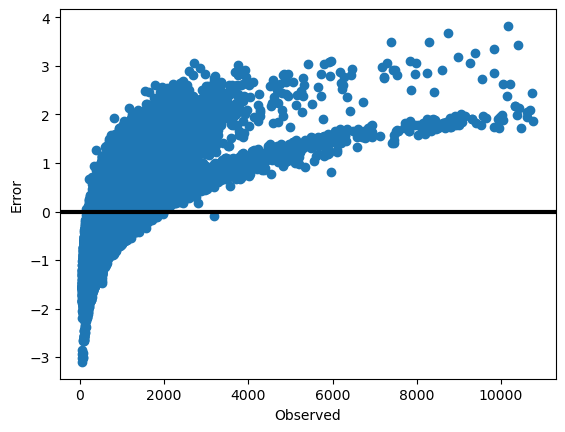

In [364]:
# plot the error difference
error = np.log(y_test) - np.log(y_pred)
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

RMSE is 577.41486
R2 error is  0.1944651601248124


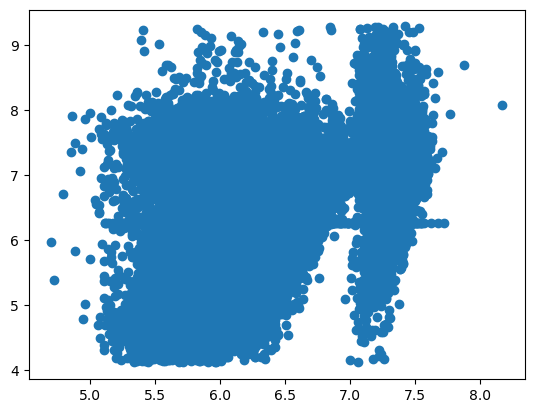

In [365]:
#RMSE
print("RMSE is", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 error is " ,r2_score(y_test, y_pred))

plt.scatter(np.log(y_pred), np.log(y_test))



Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

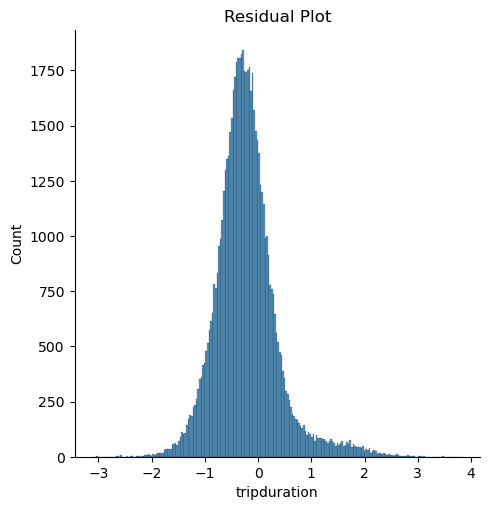

In [366]:
plt.figure()

sns.displot(error)

plt.title("Residual Plot")

## Imputation with mode

In [367]:
## Ampute the data
X_train_amp , y_train_amp = ampute_nan_values(X_train,y_train,"birthyear",perc=5)
print('Test after amputation', X_train_amp.shape, y_train_amp.shape)
print(X_train_amp.isnull().sum())
print(y_train_amp.isnull().sum())

X_test_amp , y_test_amp = ampute_nan_values(X_test,y_test,"birthyear",perc=5)
print('Test after amputation', X_test_amp.shape, y_test_amp.shape)
print(X_test_amp.isnull().sum())
print(y_test_amp.isnull().sum())

Test after amputation (268102, 28) (268102,)
start_lat             0
start_lon             0
end_lat               0
end_lon               0
usertype              0
gender                0
dist                  0
birthyear         13405
date                  0
month                 0
day                   0
hour                  0
min                   0
year                  0
years_old             0
holiday               0
datetime              0
temp                  0
feelslike             0
precip                0
dew                   0
humidity              0
snow                  0
windspeed             0
visibility            0
solarradiation        0
conditions            0
seasons               0
dtype: int64
13405
Test after amputation (67026, 28) (67026,)
start_lat            0
start_lon            0
end_lat              0
end_lon              0
usertype             0
gender               0
dist                 0
birthyear         3351
date                 0
month         

In [368]:
y_test_amp.mode()

0    518.692017
Name: tripduration, dtype: float32

In [372]:
X_test_amp['birthyear'] = X_test_amp['birthyear'].fillna(X_test_amp['birthyear'].mode()[0])
y_test_amp = y_test_amp.fillna(y_test_amp.mode()[0])
print('test after Imputation', X_test_amp.shape, y_test_amp.shape)
print(X_test_amp.isnull().sum())
print(y_test_amp.isnull().sum())

test after Imputation (67026, 28) (67026,)
start_lat         0
start_lon         0
end_lat           0
end_lon           0
usertype          0
gender            0
dist              0
birthyear         0
date              0
month             0
day               0
hour              0
min               0
year              0
years_old         0
holiday           0
datetime          0
temp              0
feelslike         0
precip            0
dew               0
humidity          0
snow              0
windspeed         0
visibility        0
solarradiation    0
conditions        0
seasons           0
dtype: int64
0


In [373]:
X_train_amp['birthyear'] = X_train_amp['birthyear'].fillna(X_train_amp['birthyear'].mode()[0])
y_train_amp = y_train_amp.fillna(y_train_amp.mode()[0])
print('Train after Imputation', X_train_amp.shape, y_train_amp.shape)
print(X_train_amp.isnull().sum())
print(y_train_amp.isnull().sum())

Train after Imputation (268102, 28) (268102,)
start_lat         0
start_lon         0
end_lat           0
end_lon           0
usertype          0
gender            0
dist              0
birthyear         0
date              0
month             0
day               0
hour              0
min               0
year              0
years_old         0
holiday           0
datetime          0
temp              0
feelslike         0
precip            0
dew               0
humidity          0
snow              0
windspeed         0
visibility        0
solarradiation    0
conditions        0
seasons           0
dtype: int64
0


In [374]:

X_train_encoded, X_test_encoded = get_encoded_data(X_train_amp, X_test_amp)
y_train = y_train_amp.astype('float32')
y_test = y_test_amp.astype('float32')

model = linear_model.LinearRegression().fit(X_train_encoded, y_train) 
print(model.intercept_)
print(model.coef_)
score = model.score(X_test_encoded, y_test)
print(" Score is ", score)
y_pred = model.predict(X_test_encoded)
print(" y_pred is ", y_pred)

df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)


-1493167.9
[-1.67254602e+03 -3.18130249e+02  3.50844482e+02 -9.36274597e+02
  1.89703789e+01  2.80359985e+02 -2.23796082e+00  4.06805420e+00
  1.02228165e-01  7.23228516e+02  2.98347473e-02  4.59104919e+00
  9.10232544e-01 -3.30444336e-01 -2.09012604e+00  8.76007080e-01
  8.02044868e+00 -3.95568848e-01  3.01300049e+00  1.50917053e-01
 -8.91830078e+02  2.33429203e+01  1.14387760e+01  2.35872307e+01
  4.14706573e+01  5.10438538e+00  3.51749954e+01  4.17990494e+01
  3.30493851e+01  4.76531982e+00 -1.19163227e+01 -1.82781696e-01
 -4.55328827e+01 -1.71478176e+01  1.69010677e+01  1.28835354e+01
  2.71246262e+01  2.78877010e+01  1.34388838e+01 -4.69104767e+01
 -7.27159214e+00  8.45420933e+00  1.14998379e+01  7.91201234e-01
  9.38048363e+00  6.10495949e+00 -3.43430138e+01 -4.98304367e+01
  2.25176525e+00 -2.72087187e-01  2.39707184e+01  1.23151579e+01
  1.30302715e+01 -1.70644817e+01 -1.19556980e+01  1.76903763e+01
  2.48634968e+01  2.62792611e+00  2.31669247e-02  6.68304491e+00
 -2.68068867e+

 Score is  0.18635049313945506
 y_pred is  [223.5   507.75  462.    ... 327.25  342.625 298.5  ]
        Actual  Predicted
292209   498.0    223.500
116919   518.0    507.750
138648   531.0    462.000
46042    546.0    473.500
215133   330.0    421.625
...        ...        ...
292855   197.0    254.375
18475   1093.0    647.875
100429   358.0    327.250
270749   197.0    342.625
98068    133.0    298.500

[67026 rows x 2 columns]


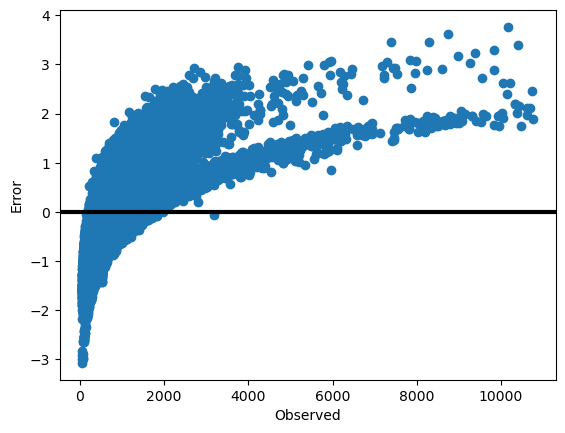

In [375]:

# plot the error difference
error = np.log(y_test) - np.log(y_pred)
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

RMSE is 568.314
R2 error is  0.18635050864630387


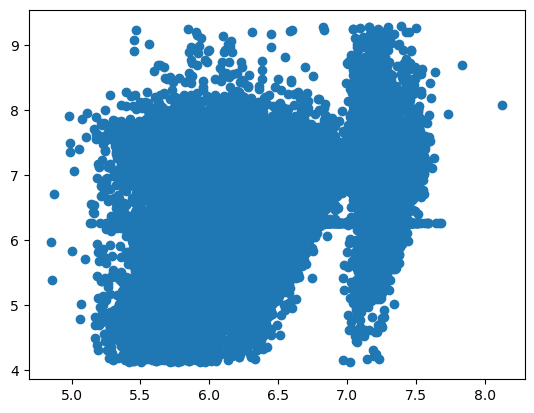

In [376]:

#RMSE
print("RMSE is", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 error is " ,r2_score(y_test, y_pred))

plt.scatter(np.log(y_pred), np.log(y_test))

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

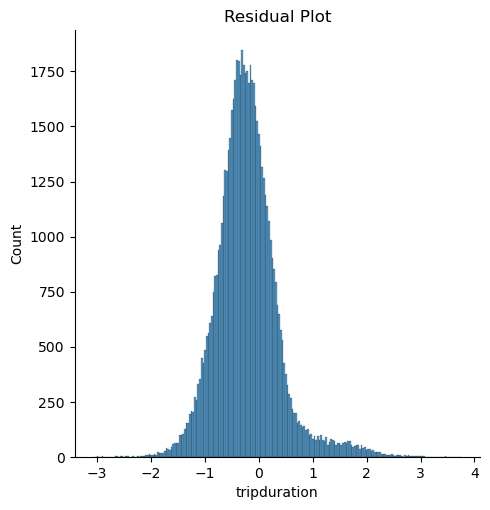

In [377]:
plt.figure()

sns.displot(error)

plt.title("Residual Plot")